# Decision Tree

Objective: Predicting types of appoinment Show or No Show given on certain attributes  
Dataset: appointmentShowNo.csv  
Ref: NA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("appointmentShowNo.csv", delimiter=",")
print('Dataset size', data.shape)
data.head()

Dataset size (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Exploration

No     88208
Yes    22319
Name: Show, dtype: int64


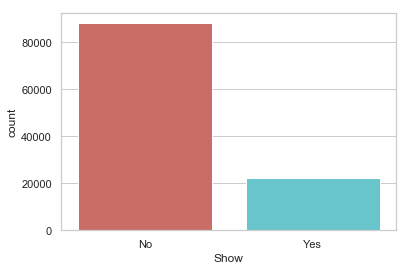

In [2]:
print(data['Show'].value_counts())

sns.countplot(x='Show',data = data, palette='hls',order = data['Show'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

F    71840
M    38687
Name: Gender, dtype: int64


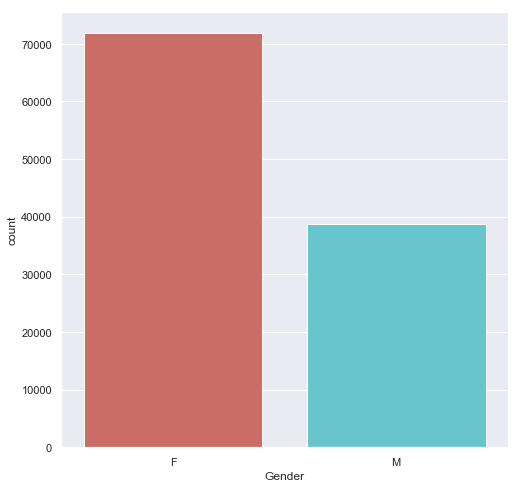

In [3]:
print(data['Gender'].value_counts())

sns.countplot(x='Gender',data = data, palette='hls',order = data['Gender'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

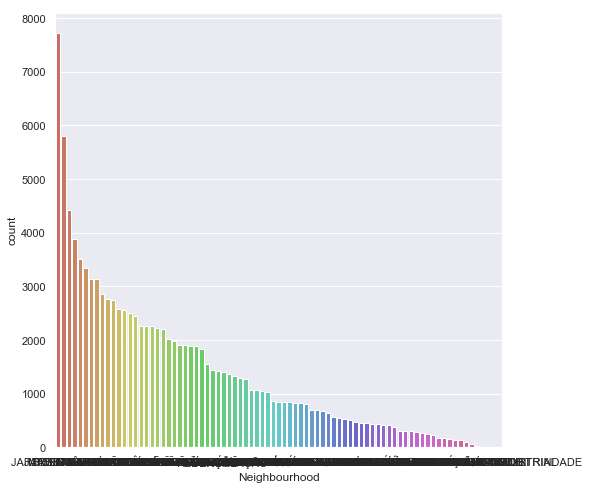

In [4]:
print(data['Neighbourhood'].value_counts())

sns.countplot(x='Neighbourhood',data = data, palette='hls',order = data['Neighbourhood'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [5]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Show               object
dtype: object

In [6]:
data["Gender"] = data["Gender"].astype('category')
data["GenderC"] = data["Gender"].cat.codes      # F=0, M=1

data["Neighbourhood"] = data["Neighbourhood"].astype('category')
data["NeighbourhoodC"] = data["Neighbourhood"].cat.codes      

data["Show"] = data["Show"].astype('category')
data["ShowC"] = data["Show"].cat.codes  

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,GenderC,NeighbourhoodC,ShowC
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,39,0
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,39,0
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,45,0
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,54,0
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,39,0


In [7]:
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,GenderC,NeighbourhoodC,ShowC
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,39,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,39,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,45,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,54,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,39,0


## Correlation

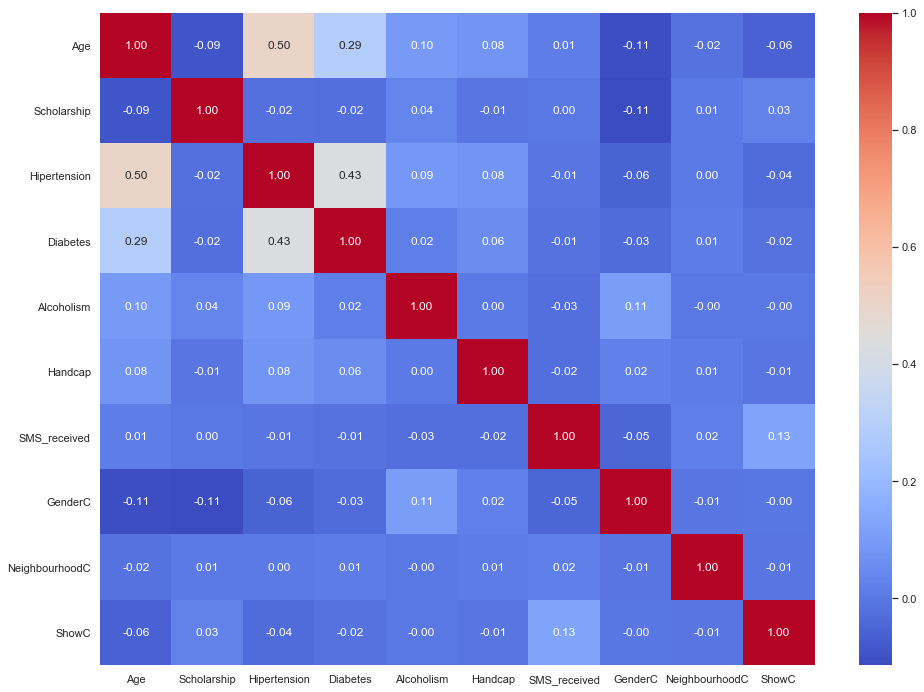

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [9]:
corr_rank = data.corr()
corr_rank["ShowC"].sort_values(ascending=False)

ShowC             1.000000
SMS_received      0.126431
Scholarship       0.029135
Alcoholism       -0.000196
GenderC          -0.004119
Handcap          -0.006076
NeighbourhoodC   -0.008962
Diabetes         -0.015180
Hipertension     -0.035701
Age              -0.060319
Name: ShowC, dtype: float64

## Data Processing and Selection

In [10]:
#split dataset - feature
X = data[['SMS_received','Scholarship','Alcoholism','GenderC',
          'Handcap','NeighbourhoodC','Diabetes','Hipertension','Age']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (110527, 9)


array([[ 0,  0,  0,  0,  0, 39,  0,  1, 62],
       [ 0,  0,  0,  1,  0, 39,  0,  0, 56]], dtype=int64)

In [11]:
y = data["ShowC"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (110527,)


0    0
1    0
2    0
3    0
4    0
Name: ShowC, dtype: int8

## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.3,random_state=3)

print("X TRAIN Set: ", X_trainset.shape, y_trainset.shape)
print("X TEST Set : ", X_testset.shape, y_testset.shape)

X TRAIN Set:  (77368, 9) (77368,)
X TEST Set :  (33159, 9) (33159,)


## Decision Tree

In [13]:
#specify criterion='entropy' see information gain of each node (using gini given same result)
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#fit with data
DTree.fit(X_trainset, y_trainset)

#making prediction and store in predTree
predTree = DTree.predict(X_testset)
print(predTree.shape)
predTree

(33159,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [14]:
#calculate model accuracy
from sklearn import metrics
print("Decision Tree's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree),5))
print("Accuracy score 2        : ", round(DTree.score(X_testset, y_testset),5))

Decision Tree's Accuracy:  0.79948
Accuracy score 2        :  0.79948
